Fabian Rodriguez - Sergio Ardila - Juan Camilo Marín - Julián Velásquez

# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv(r'C:\Users\juanv\Documents\MIIA\7. Modelos Avanzados para el analisis de datos 1\AdvancedMethodsDataAnalysisClass-master\datasets\data_arma.csv', skiprows=0)
df.head()

,Unnamed: 0,ts1,ts2,ts3,ts4
0,0,0.533570,-0.126804,-0.802837,1.812825
1,1,1.240130,1.314360,-0.595602,0.042764
2,2,1.618598,1.405994,0.127180,-1.759427
3,3,1.140465,3.132621,0.958586,-0.456798
4,4,0.481561,3.179083,0.164598,-1.254790


In [4]:
df.set_index('Unnamed: 0', inplace=True)
df.head()

,ts1,ts2,ts3,ts4
Unnamed: 0,,,,
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


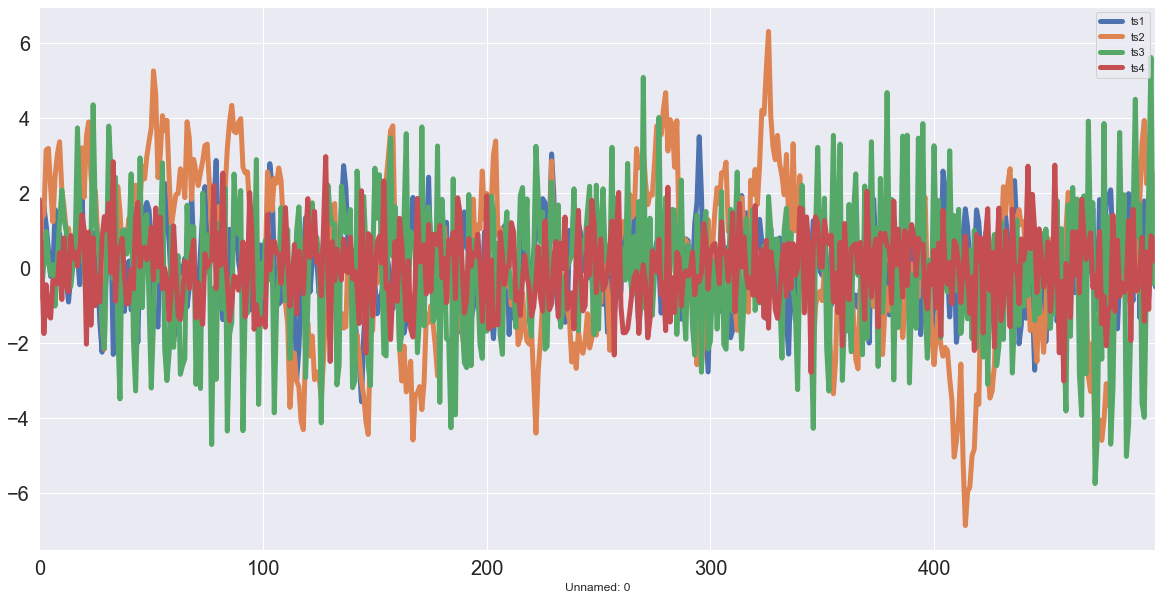

In [5]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20);

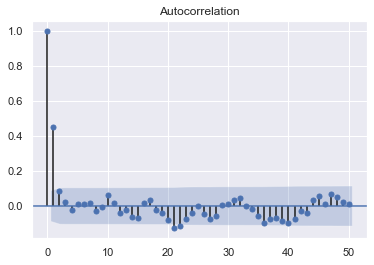

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["ts1"], lags=50);

Dado que la autocorrelación se encuentra en el intervalo de confianza igual a 0, podemos determinar que es MA.

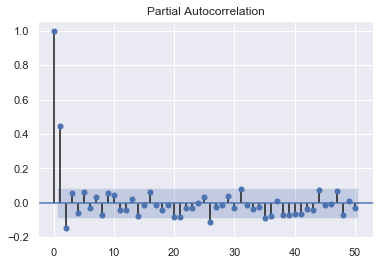

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["ts1"], lags=50);

Por otro lado, el gráfico de autocorrelación parcial nos indica que es MA de orden 1.

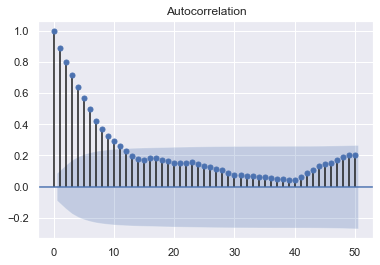

In [8]:
plot_acf(df["ts2"], lags=50);

Dado que la correlacion va disminuyendo y se se encuentra fuera del intervalo de confianza igual a 0, podemos concluir que la serie AR.

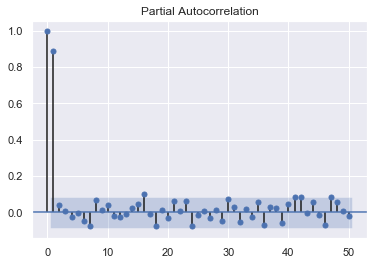

In [9]:
plot_pacf(df["ts2"], lags=50);

Por otro lado, el gráfico de autocorrelación parcial nos indica que es AR de orden 1.

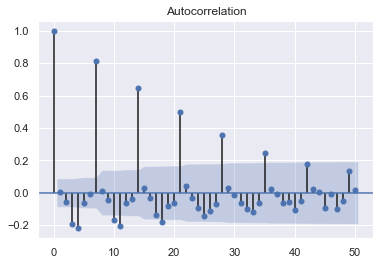

In [10]:
plot_acf(df["ts3"], lags=50);

Dado que la correlacion va disminuyendo y se se encuentra fuera del intervalo de confianza igual a 0, podemos concluir que la serie AR.

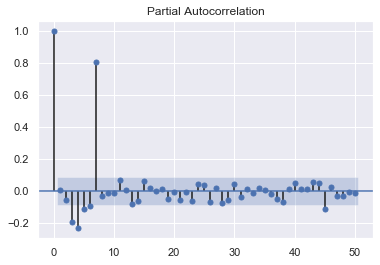

In [11]:
plot_pacf(df["ts3"], lags=50);

Por otro lado, el gráfico de autocorrelación parcial nos indica que es AR de orden 7.

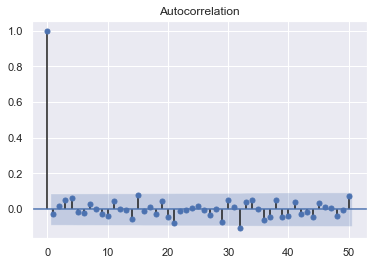

In [12]:
plot_acf(df["ts4"], lags=50);

Dado que la autocorrelación se encuentra en el intervalo de confianza igual a 0, podemos determinar que es MA.

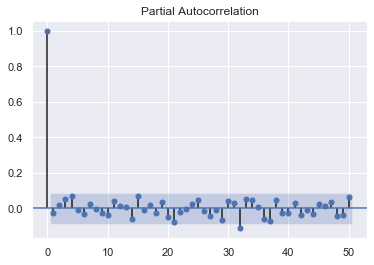

In [13]:
plot_pacf(df["ts4"], lags=50);

Por otro lado, el gráfico de autocorrelación parcial nos indica que es una serie aleatoria o random.

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\juanv\Documents\MIIA\7. Modelos Avanzados para el analisis de datos 1\AdvancedMethodsDataAnalysisClass-master\datasets\shampoo.csv")
df.head()
df.set_index('Month', inplace=True)

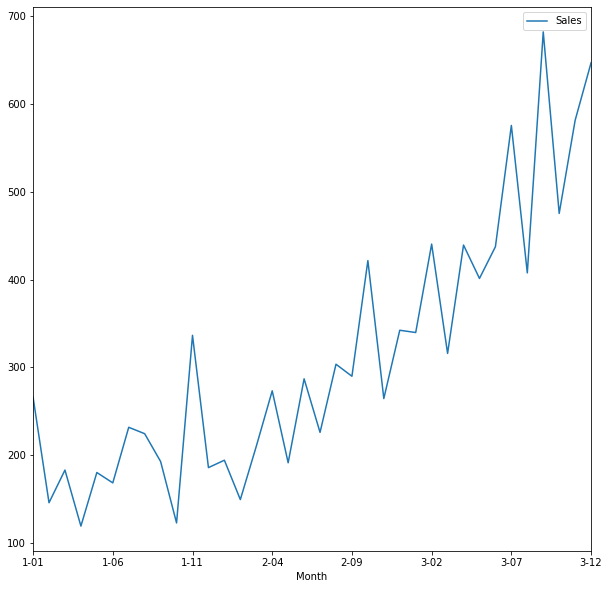

In [3]:
df.plot(figsize=(10, 10));

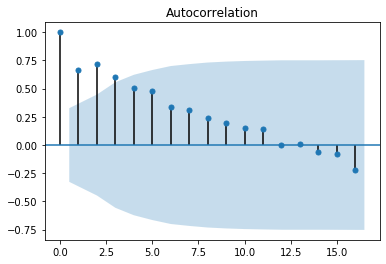

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df);

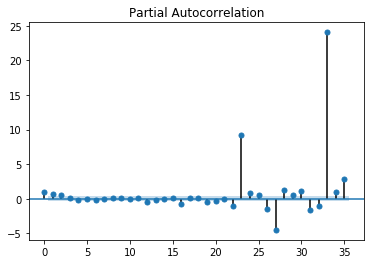

In [5]:
plot_pacf(df, lags=35);

In [6]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

errors = list()
for i in range(7):
    for j in range(7):
        for k in range(7):
            X = df.values
            size = int(len(X) * 0.5)
            train, test = X[0:size], X[size:len(X)]
            history = [x for x in train]
            predictions = list()
            try:
                for t in range(len(test)):
                    model = ARIMA(history, order=(i,j,k))
                    model_fit = model.fit(disp=0)
                    output = model_fit.forecast()
                    yhat = output[0]
                    predictions.append(yhat)
                    obs = test[t]
                    history.append(obs)
                error = mean_squared_error(test, predictions)**0.5
                errors.append(error)
                print("P= " + str(i) + " D= " + str(j) + " Q= " + str(k))
                print("MSE=" + str(error))
            except:
                pass

P= 0 D= 0 Q= 0
MSE=203.2120873817677
P= 0 D= 0 Q= 1
MSE=176.48932677137637
P= 0 D= 0 Q= 2
MSE=142.80496755899165
P= 0 D= 1 Q= 0
MSE=126.62868646022001
P= 0 D= 1 Q= 1
MSE=93.25512484050805
P= 0 D= 1 Q= 2
MSE=85.8882116248903
P= 0 D= 1 Q= 3
MSE=91.2470935642209
P= 0 D= 1 Q= 4
MSE=92.55077057792225
P= 0 D= 1 Q= 5
MSE=85.02375752969763
P= 0 D= 1 Q= 6
MSE=95.73489431760284
P= 0 D= 2 Q= 0
MSE=240.76791336565407
P= 0 D= 2 Q= 1
MSE=129.45143739272888
P= 0 D= 2 Q= 3
MSE=67.39817930122855
P= 1 D= 0 Q= 0
MSE=142.43247577795563
P= 1 D= 0 Q= 2
MSE=91.66788920254136
P= 1 D= 1 Q= 0
MSE=80.04417013189627
P= 1 D= 1 Q= 1
MSE=84.04271587396556
P= 1 D= 2 Q= 0
MSE=125.17148353708545
P= 2 D= 0 Q= 0
MSE=101.29828676025434
P= 2 D= 1 Q= 0
MSE=74.3181084807797
P= 2 D= 2 Q= 0
MSE=97.5609113632558
P= 3 D= 0 Q= 0
MSE=100.18430393457824
P= 3 D= 1 Q= 0
MSE=78.70057265662203
P= 3 D= 1 Q= 1
MSE=86.73241266056615
P= 3 D= 2 Q= 0
MSE=96.42580666974492
P= 4 D= 0 Q= 0
MSE=100.77767360174353
P= 4 D= 1 Q= 0
MSE=79.7046472510

In [17]:
min(errors)

67.39817930122855

Podemos observar que los valores de p, d y q que minimizan el error son los siguientes:
* p = 0
* d = 2
* q = 3

Lo cual nos daría un MSE de 67.39817930122855